In [2]:
import pandas as pd
import umap

2024-03-03 22:36:27.702781: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-03 22:36:27.749147: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 22:36:27.749172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 22:36:27.750363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 22:36:27.757241: I tensorflow/core/platform/cpu_feature_guar

In [3]:
df = pd.read_parquet("embed-large-3-avg.parquet")

In [4]:
df.head()

,embed
name,
pdb101m.ent.gz,"[-13.140137195587158, 1.1296344101428986, -11...."
pdb102l.ent.gz,"[-3.323514938354492, -0.40126025676727295, -2...."
pdb102m.ent.gz,"[-13.150800228118896, 0.06714001297950745, -13..."
pdb103l.ent.gz,"[0.0745539665222168, -7.362520098686218, -5.79..."
pdb103m.ent.gz,"[-13.429691791534424, 0.24975591897964478, -13..."


In [5]:
embedder = umap.UMAP(n_neighbors=20)

In [6]:
emebd2D = embedder.fit_transform(df["embed"].tolist())

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


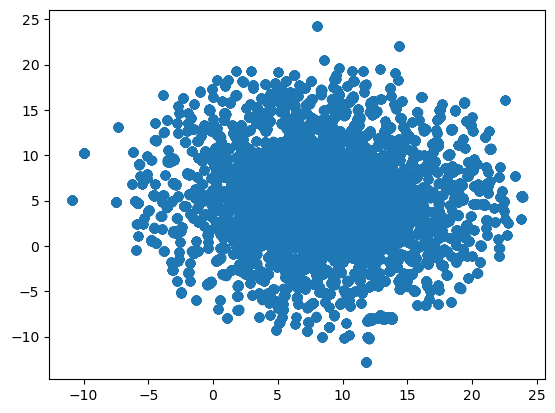

In [7]:
import matplotlib.pyplot as plt
plt.scatter(emebd2D[:, 0], emebd2D[:, 1])

In [8]:
pd.DataFrame({"x": emebd2D[:, 0], "y": emebd2D[:, 1], "name": df.index, "embed": df["embed"]}).to_parquet("embed2D-large-3.parquet", index=False)